In [1]:

import mod
from mod import *

In [2]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions as RXN

from rdkit.Chem import Draw
from rdkit.Chem import AllChem
# from rdchiral.main import rdchiralRun, rdchiralReaction, rdchiralReactants
import pandas as pd 

# sys.path.append("/home/talax/xtof/local/Mod/lib64")


: 

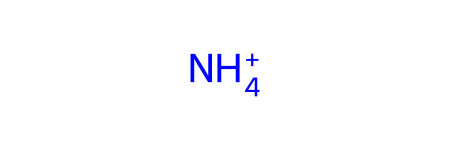

In [6]:
Chem.MolFromSmiles('[H][N+]([H])([H])[H]')

In [3]:
def is_smiles(encoding):
    try:
        Chem.MolFromSmiles(encoding)
        return True
    except:
        if all(c in '[].()+=-0123456789' for c in encoding):  # Allow basic SMILES symbols and brackets
            return True
        else:
            return False

encoding = "[CoA][S][H]"

is_smiles(encoding)

[13:59:13] SMILES Parse Error: syntax error while parsing: [CoA][S][H]
[13:59:13] SMILES Parse Error: Failed parsing SMILES '[CoA][S][H]' for input: '[CoA][S][H]'


True

In [84]:
#FULL CONTENT DATAFRAME
rxns = pd.read_csv("/home/mescalin/yitao/Documents/Code/CRN_IMA/ruleset_.csv")  
rxns

,Reaction Smarts,Name,EC Number
0,[O:1]=[P:2]([OH:3])([O:4][H:29])[OH:5].[OH:6][...,cellobiose + phosphate = alpha-D-glucose 1-ph...,2.4.1.20
1,[*:1][P:2](=[O:3])([OH:4])([OH:5]).[O:6]([H:18...,ATP+glucose= ADP+Glucose 6-phosphate,2.7.1.63
2,[O:1]=[P:2]([OH:3])([OH:4])[O:5][C@H:6]1[O:7][...,alpha-D-glucose 1-phosphate = D-glucose 6-pho...,5.4.2.2
3,[O:1]=[CH:2][C@H:3]([OH:4])[C@@H:5]([OH:6])[C@...,D-Glucose 6-phosphate = L-myo-Inositol 1-phos...,5.5.1.4
4,[OH:1][H:18].[O:2]=[P:3]([OH:4])([OH:5])[O:6][...,inositol 1-phosphate + H2O = myo-inositol + p...,3.1.3.25
5,[OH:1][CH2:2][C@H:3]1[O:4][CH:5]([O:6][H:13])[...,glucose= D-Glucose,TBD


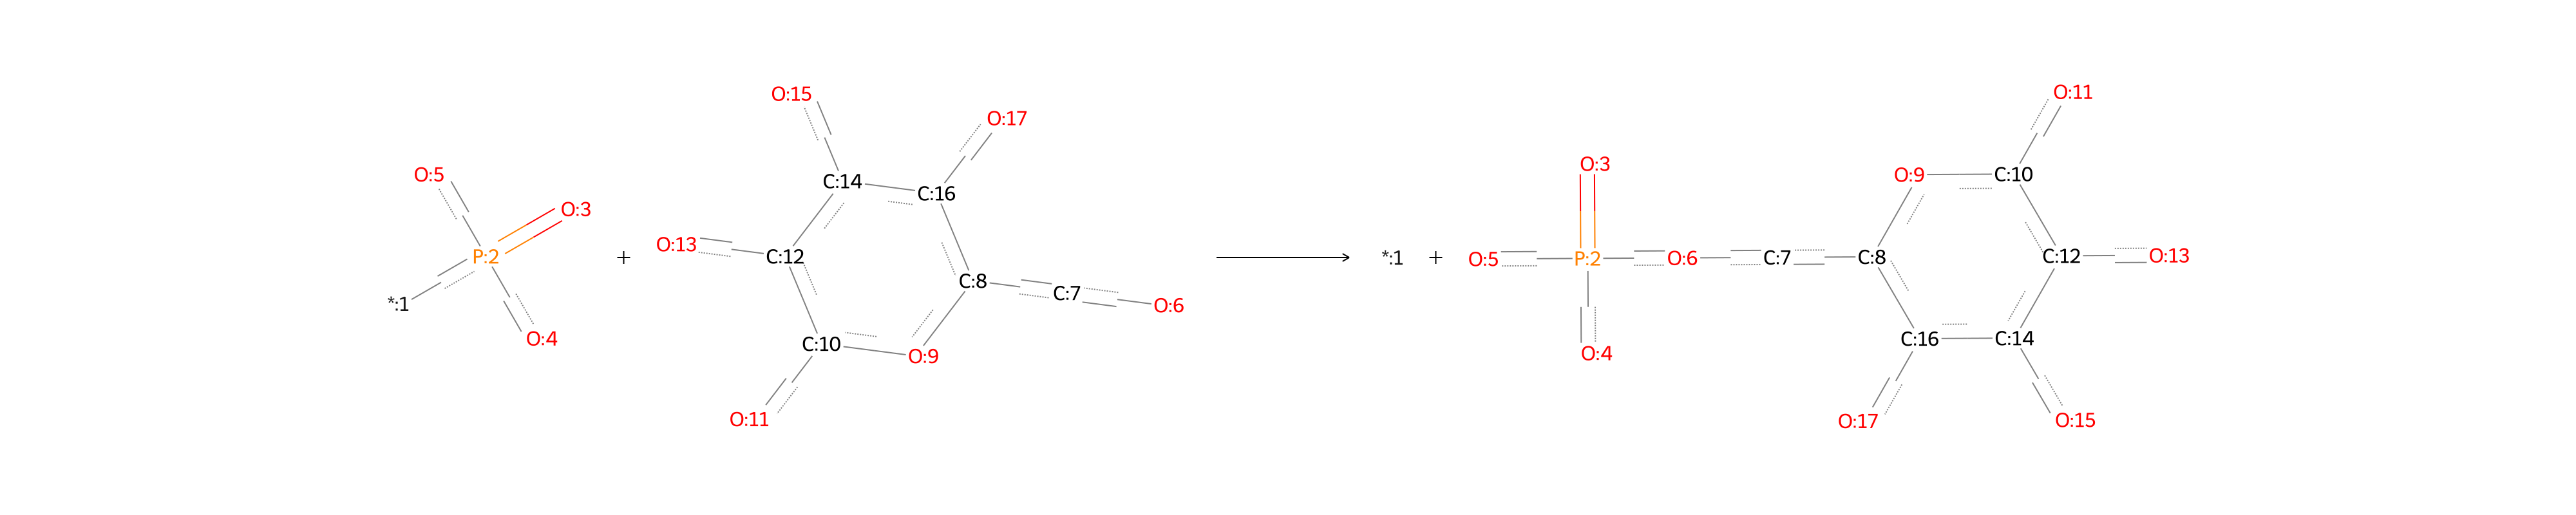

In [34]:
SMT ="[*:1][P:2](=[O:3])([OH:4])([OH:5]).[OH:6][CH2:7][C@H:8]1[O:9][CH:10]([OH:11])[C@H:12]([OH:13])[C@@H:14]([OH:15])[C@@H:16]1[OH:17]>>[*:1].[P:2](=[O:3])([OH:4])([OH:5])[O:6][CH2:7][C@H:8]1[O:9][CH:10]([OH:11])[C@H:12]([OH:13])[C@@H:14]([OH:15])[C@@H:16]1[OH:17]"

r = RXN.ReactionFromSmarts(SMT)
Draw.ReactionToImage(r, subImgSize=(800, 800))

[OH:1][CH2:2][C@H:3]1[O:4][CH:5]([O:6][H:13])[C@H:7]([OH:8])[C@@H:9]([OH:10])[C@@H:11]1[OH:12]>>[OH:1][CH2:2][C@H:3]([O:4][H:13])[C@@H:11]([OH:12])[C@@H:9]([OH:10])[C@H:7]([OH:8])[CH:5](=[O:6])


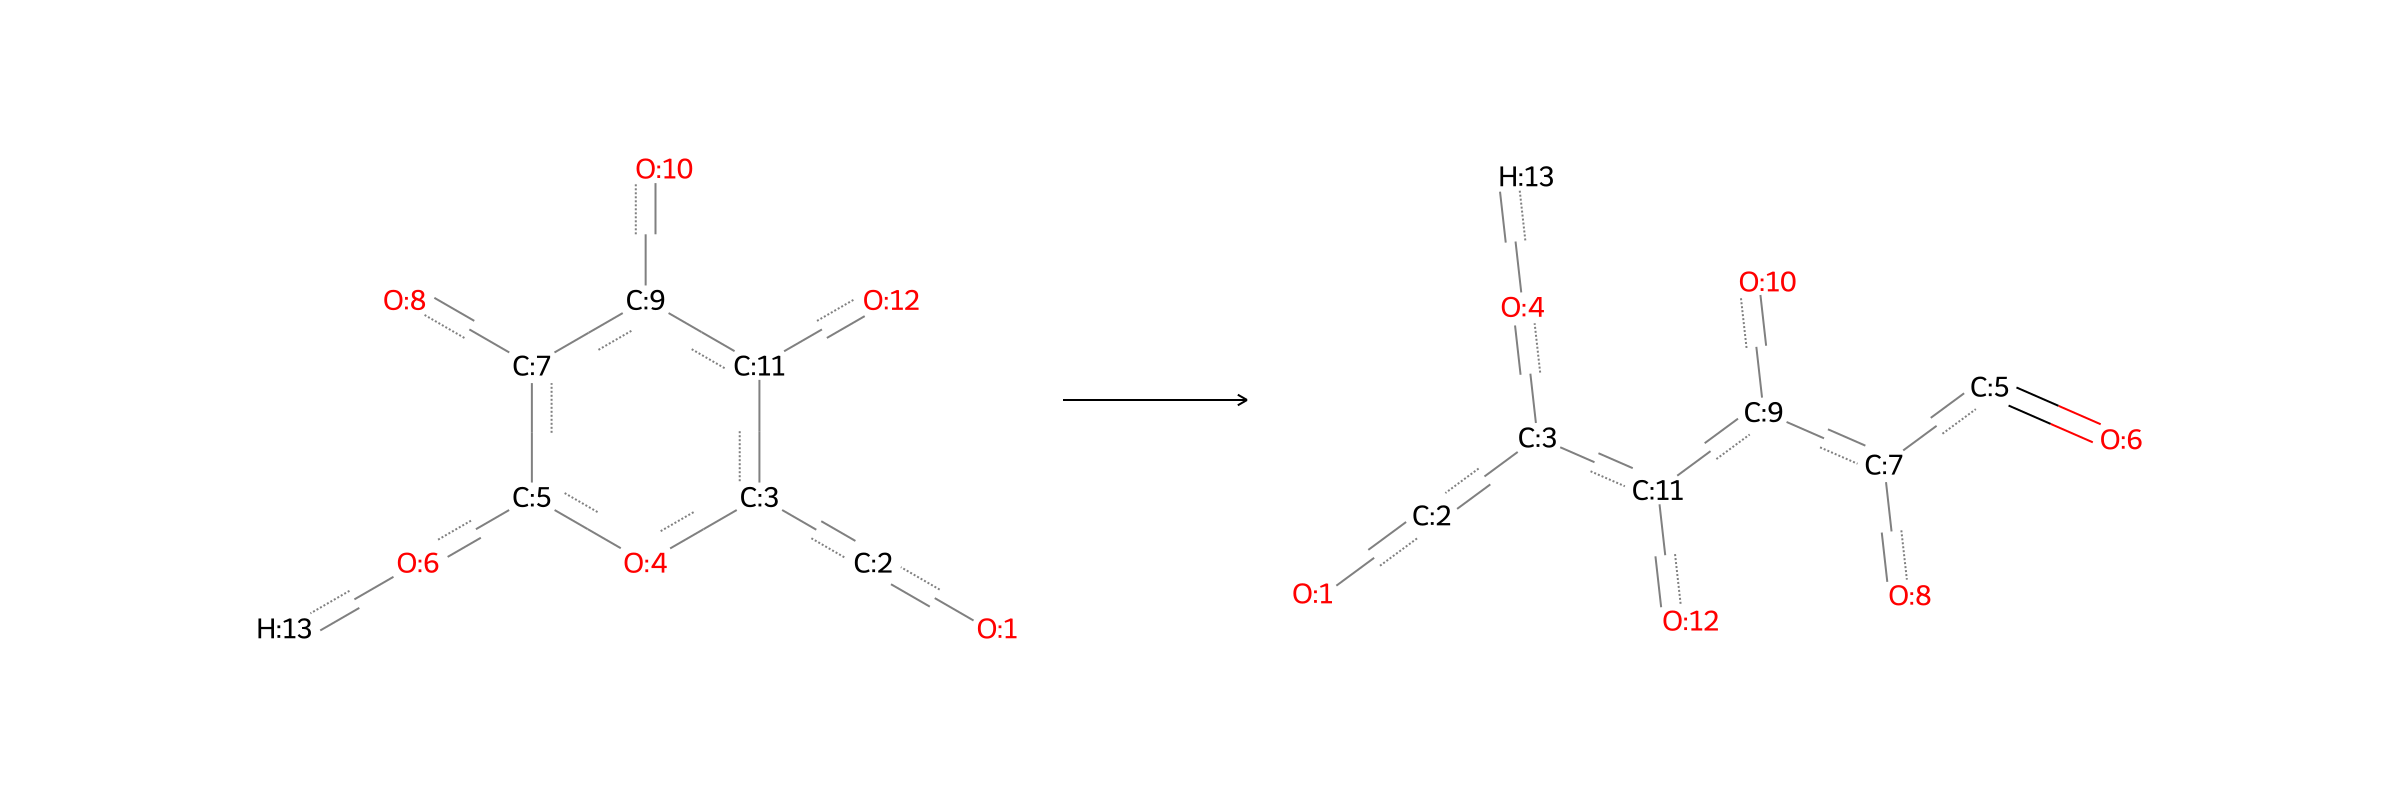

In [85]:


reactions = rxns[["Reaction Smarts","Name"]].to_numpy()
rxn = reactions[5][0]
print(rxn)
rxn = RXN.ReactionFromSmarts(rxn)
#draw the reaction
Draw.ReactionToImage(rxn, subImgSize=(800, 800))

In [75]:
# rxns = pd.read_csv("/home/mescalin/yitao/Documents/Datasets/processed_reactions.csv",)
# rxns

G1P = smiles('C(C1C(C(C(C(OP(O)(O)=O)O1)O)O)O)O', name='G1P')
g1p_ = smiles('C(C1C(C(C(C(O1)OP(=O)(O)O)O)O)O)O',name='g1p_')
G1P.isomorphism(g1p_)

1

In [4]:

rxn_smt_array = rxns[["mapped","orig_rxn_text","quality"]].to_numpy()
# RXN.ReactionFromSmarts(rxn_smt_1,useSmiles=True)
rxn_smt_1 = rxn_smt_array[0]

rxn_smt_array[30791]

array(['[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n+:8]([C@@H:9]2[O:10][C@H:11]([CH2:12][O:13][P:14](=[O:15])([OH:16])[O:17][P:18](=[O:19])([OH:20])[O:21][CH2:22][C@H:23]3[O:24][C@@H:25]([n:26]4[cH:27][n:28][c:29]5[c:30]([NH2:31])[n:32][cH:33][n:34][c:35]45)[C@H:36]([O:37][P:38](=[O:39])([OH:40])[OH:41])[C@@H:42]3[OH:43])[C@@H:44]([OH:45])[C@H:46]2[OH:47])[cH:48]1.[OH:49][CH2:50][C@@H:51]([OH:52])[C@H:53]([OH:54])[C@@H:55]([OH:56])[CH2:57][OH:58]>>[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:48][N:8]([C@@H:9]2[O:10][C@H:11]([CH2:12][O:13][P:14](=[O:15])([OH:16])[O:17][P:18](=[O:19])([OH:20])[O:21][CH2:22][C@H:23]3[O:24][C@@H:25]([n:26]4[cH:27][n:28][c:29]5[c:30]([NH2:31])[n:32][cH:33][n:34][c:35]45)[C@H:36]([O:37][P:38](=[O:39])([OH:40])[OH:41])[C@@H:42]3[OH:43])[C@@H:44]([OH:45])[C@H:46]2[OH:47])[CH:7]=[CH:6][CH2:5]1.[O:49]=[CH:50][C@H:51]([OH:52])[C@@H:53]([OH:54])[C@H:55]([OH:56])[CH2:57][OH:58]',
       'D-xylose + NADPH + H+ = xylitol + NADP+', 1.0], dtype=object)

In [86]:

from utils import smarts_to_gml_v2

for i,reaction in enumerate(reactions):
    reaction_smarts = reaction[0]
    reaction_name = reaction[1]
    try:
        gml_format_rule = smarts_to_gml_v2(reaction_smarts, reaction_name)
  
        file_path = f"/home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule{i}.gml"
        
        # Write the GML rule to a file
        with open(file_path, "w") as f:
            f.write(gml_format_rule)
        
        print(f"Successfully wrote GML rule for {reaction_name} to {file_path}")
    except:
        print(f"Failed to convert reaction {reaction_name} to GML")
        continue

    






Successfully wrote GML rule for  cellobiose + phosphate = alpha-D-glucose 1-phosphate + D-glucose to /home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule0.gml
Successfully wrote GML rule for  ATP+glucose= ADP+Glucose 6-phosphate to /home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule1.gml
Successfully wrote GML rule for  alpha-D-glucose 1-phosphate = D-glucose 6-phosphate to /home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule2.gml
Successfully wrote GML rule for  D-Glucose 6-phosphate = L-myo-Inositol 1-phosphate to /home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule3.gml
Successfully wrote GML rule for  inositol 1-phosphate + H2O = myo-inositol + phosphate to /home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule4.gml
Successfully wrote GML rule for  glucose= D-Glucose  to /home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule5.gml


In [14]:
from utils import smarts_to_gml
import os

# Assuming `rxns` is a DataFrame with the necessary data
reactions = rxns[["Reaction Smarts", "Name"]].to_numpy()
print(reactions)
for i, reaction in enumerate(reactions):
    reaction_smarts = reaction[0]
    reaction_name = reaction[1]
    
    try:
        # Convert SMARTS to GML
        gml_format_rule = smarts_to_gml(reaction_smarts)
        print(gml_format_rule)
        # Define the file path
        # file_path = f"/home/mescalin/yitao/Documents/Code/CRN_IMA/gml_rules/test_rule{i}.gml"
        
        # # Write the GML rule to a file
        # with open(file_path, "w") as f:
        #     f.write(gml_format_rule)
        
        # print(f"Successfully wrote GML rule for {reaction_name} to {file_path}")
    except ImportError as ie:
        print(f"Import error: {ie}")
        continue
    except FileNotFoundError as fe:
        print(f"File path error: {fe}")
        continue
    except Exception as e:
        print(f"Failed to convert reaction {reaction_name} to GML. Error: {e}")
        continue


[['[O:1]=[P:2]([OH:3])([OH:4])[OH:5].[OH:6][CH2:7][C@H:8]1[O:9][C@H:10]([O:11][C@H:12]2[C@H:13]([OH:14])[C@@H:15]([OH:16])[C@H:17]([OH:18])[O:19][C@@H:20]2[CH2:21][OH:22])[C@H:23]([OH:24])[C@@H:25]([OH:26])[C@@H:27]1[OH:28]>>[O:1]=[P:2]([OH:3])([O:4][C@H:10]1[O:9][C@H:8]([CH2:7][OH:6])[C@@H:27]([OH:28])[C@H:25]([OH:26])[C@H:23]1[OH:24])[OH:5].[OH:11][C@H:12]1[C@H:13]([OH:14])[C@@H:15]([OH:16])[C@H:17]([OH:18])[O:19][C@@H:20]1[CH2:21][OH:22]'
  ' cellobiose + phosphate = alpha-D-glucose 1-phosphate + D-glucose']
 ['[O:1]=[P:2]([OH:3])([OH:4])[OH:5].[OH:6][CH2:7][C@H:8]1[O:9][C@H:10](ADP:11)[C@H:23]([OH:24])[C@@H:25]([OH:26])[C@@H:27]1[OH:28]>>[O:1]=[P:2]([OH:3])([O:4][C@H:10]1[O:9][C@H:8]([CH2:7][OH:6])[C@@H:27]([OH:28])[C@H:25]([OH:26])[C@H:23]1[OH:24])[OH:5].[ADP:11]'
  ' ATP+glucose= ADP+Glucose 6-phosphate']
 ['[O:1]=[P:2]([OH:3])([OH:4])[O:5][C@H:6]1[O:7][C@H:8]([CH2:9][OH:10])[C@@H:11]([OH:12])[C@H:13]([OH:14])[C@H:15]1[OH:16]>>[O:1]=[P:2]([OH:3])([OH:4])[O:5][CH2:6][C@@H:15]([C@H

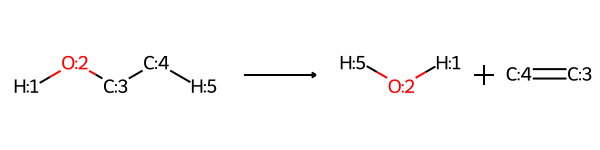

In [6]:
RXN.ReactionFromSmarts(reaction_smarts, useSmiles=True)

In [9]:
gml_rule = ruleGMLString("""gml_format_rule""")

InputError: Parsing failed at 1:4:
gml_format_rule
---^
Expected value.
End of x3 error.
Could not load rule from <inline GML string>.

In [12]:
chexanon = smiles("C1(=O)CCCCC1", "cHEXON")
chexanol = smiles("C1(O)CCCCC1", "cHEXOL")
hexonol = smiles("O=CCCCCCO", "HEXONOL")
hexonon = smiles("O=CCCCCC=O", "HEXONON")
hexdiol = smiles("OCCCCCCO", "HEXDIOL")
ecaprolacton = smiles("O1C(=O)CCCCC1", "eCALON")
nadph = graphDFS("[NADP][H]")
nadplus = graphDFS("[NADP+]")
oxygen = smiles("O=O", "O2")
water = smiles("O", "H2O")
hplus = smiles("[H+]", "hplus")

knownMols=[chexanon, chexanol, ecaprolacton, nadph, nadplus,
hexonol, hexonon, oxygen, water, hplus]
eductMols=[chexanol, hexdiol, nadplus, oxygen, hplus]

## rewrite rule(s)
bvmo = ruleGML("BVMO.gml")
adh = ruleGML("ADH.gml")
interac = ruleGML("intracetal.gml")

 ## print DPO diagramms of rules
# depricated postSection("DPO Diagramms of Rule(s)")
post.summarySection("DPO Diagramms of Rule(s)")
for r in inputRules:
    p = GraphPrinter()
    p.setReactionDefault()
    p.withIndex = True
    r.print(p)

InputError: Could not open rule GML file 'BVMO.gml':
failed opening file: No such file or directory: iostream error

In [ ]:
## define strategy for derivation graph generation
50 ## iterate grammar for 4 steps
51 strat = (addSubset(eductMols) >> repeat[4](inputRules))
52
53 ## switch to term rewrite this is necessary since wildcard atom ’*’
54 ## is used in rule interacetal.gml
55 ls = LabelSettings(LabelType.Term, LabelRelation.Unification)
56
57 ## generate derivation graph using the defined strategy
58 dg = DG(graphDatabase=knownMols, labelSettings=ls)
59 dg.build().execute(strat)
60
61 ## print derivation graph
62 dg.print()
63
64 ####################################
65 ## find pathway as integer hyperflow
66 ####################################
67
68 ## specify target molecule

In [3]:
import torch 


torch.gt(torch.tensor([[1, 2], [3, 4]]), torch.tensor([2]))

tensor([[False, False],
        [ True,  True]])